# Practical Work 3 Part 2 SGD for Multivariable LR

### Import numpy, matplotlib.pyplot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Read your multivariable LR data into X, y variables and make shure of dimensions.

In [7]:
data = np.genfromtxt("C:/Users/Dareen/Downloads/MultiVarLR (1).csv",delimiter=',')
x= data[:,:3]
y= data[ :,3]
y= y.reshape(-1,1)
print(f'x: \n {x}')
print(f'y:\n{y}')


x: 
 [[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
y:
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


### Step 1: Shuffle your data
- In this step we will also get the number of data points <b>(m)</b> and dimensions <b>n+1</b> .
- We will also add the column of ones <b>x0</b>
- Set random seed to 101.

In [12]:
m = x.shape[0]
X_new = np.concatenate((np.ones((m,1)),x),axis=1)
n_1 = X_new.shape[1]

np.random.seed(101)
D = np.concatenate((X_new,y),axis=1)

np.random.shuffle(D)
print(f'Data after shuffle:\n {D}')
X_sh = D[:,0:n_1]
y_sh = D[:,-1]
print(f'X shuffled:\n {X_sh}')
print(f'y shuffled:\n {y_sh}')

Data after shuffle:
 [[  1.  78.  75.  68. 147.]
 [  1.  69.  70.  73. 141.]
 [  1.  78.  83.  85. 175.]
 [  1.  78.  83.  77. 159.]
 [  1.  47.  56.  60. 115.]
 [  1.  86.  82.  89. 175.]
 [  1.  89.  91.  90. 180.]
 [  1.  96.  98. 100. 196.]
 [  1.  93.  88.  93. 185.]
 [  1.  70.  73.  78. 148.]
 [  1.  88.  92.  86. 177.]
 [  1.  73.  80.  75. 152.]
 [  1.  93.  95.  91. 184.]
 [  1.  53.  46.  55. 101.]
 [  1.  76.  83.  71. 149.]
 [  1.  82.  86.  90. 177.]
 [  1.  73.  66.  70. 142.]
 [  1.  87.  79.  90. 175.]
 [  1.  79.  80.  73. 152.]
 [  1.  79.  70.  88. 164.]
 [  1.  93.  89.  96. 192.]
 [  1.  96.  93.  95. 192.]
 [  1.  69.  74.  77. 149.]
 [  1.  81.  90.  93. 183.]
 [  1.  70.  65.  74. 141.]]
X shuffled:
 [[  1.  78.  75.  68.]
 [  1.  69.  70.  73.]
 [  1.  78.  83.  85.]
 [  1.  78.  83.  77.]
 [  1.  47.  56.  60.]
 [  1.  86.  82.  89.]
 [  1.  89.  91.  90.]
 [  1.  96.  98. 100.]
 [  1.  93.  88.  93.]
 [  1.  70.  73.  78.]
 [  1.  88.  92.  86.]
 [  1.  73. 

### Step 2: Parameters initialization (thetas = array of zeros, alpha = 0.00001)
- We will also define empty lists to save losses, thetas in all iterations.

In [13]:
alpha = 0.00001

thetas = np.zeros(n_1)

thetas_all = []
loss = []

### Step 3: Claculate the prediction for the first data point

In [14]:
h= thetas @ X_sh[0]
print(f'h(0) = {h}')

h(0) = 0.0


### Step 4: Claculate the error for the first data point prediction h(0) - y(0)

In [15]:
e = h-y_sh[0]
print(f'e(0) = {e}')

e(0) = -147.0


### Step 5: Claculate the cost for the first data point prediction $\mathbf{\frac{e^2}{2}}$

In [16]:
j=(e**2)/(2)
print(f'j(0) = {j}')

j(0) = 10804.5


### Step 6: Claculate the gradient vector for the first data point 
#### grad = e * X[0]

In [17]:
grad = (e*X_sh[0])
print(f'Gradient Vector:\n{grad}')

Gradient Vector:
[  -147. -11466. -11025.  -9996.]


### Step 7: Update theta values

In [18]:
thetas =  thetas - alpha * grad  
print(f'New Thetas : {thetas}')

New Thetas : [0.00147 0.11466 0.11025 0.09996]


### Step 8: Iterate through all data points to finish the first epoch
#### Save thetas and loss each iteration i.e. with each update.
#### Reinitialize parameters in the begining: thetas = array of zeros.
#### Plot the learning curves to explore parameters update in single epoch.

In [19]:
thetas = np.zeros(n_1)
thetas_all = []
loss = []
for k in range(m):
    thetas_all.append(thetas)

    h= thetas @ X_sh[k]

    e = h-y_sh[k]
    j=(e**2)/(2)
    loss.append(j)

    grad = (e*X_sh[k])

    thetas =  thetas - alpha * grad    

In [20]:
def plot_loss(Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(Losses,'-*',markersize=8)
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()
    
def plot_loss_iter(Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.plot(Losses,'-*',markersize=8)
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()
    
def plot_theta_loss(Th,Th_0_1,Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel(Th_0_1,fontsize=14,fontweight='bold')
    plt.ylabel('Loss',fontsize=14,fontweight='bold')
    plt.plot(Th,Losses,'-mo',markersize=8)
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()

def calc_best_fit(Ths,Xin):
    y_best_fit= Xin @ Ths
    return y_best_fit

def plotReg(X,y,y_pred):
    plt.figure(figsize =(10,8))
    plt.scatter(X,y)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.plot(X,y_pred,'r*-')
    plt.show()

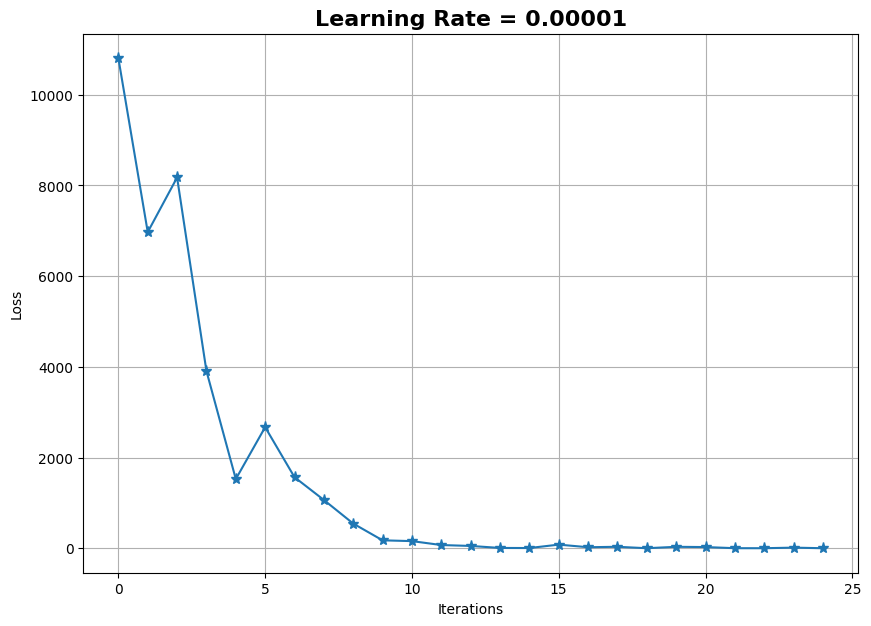

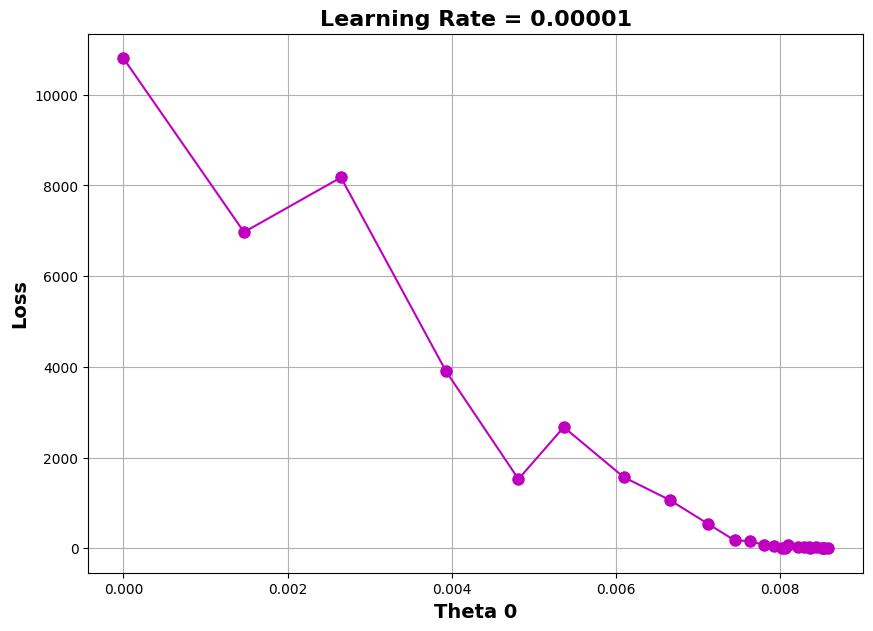

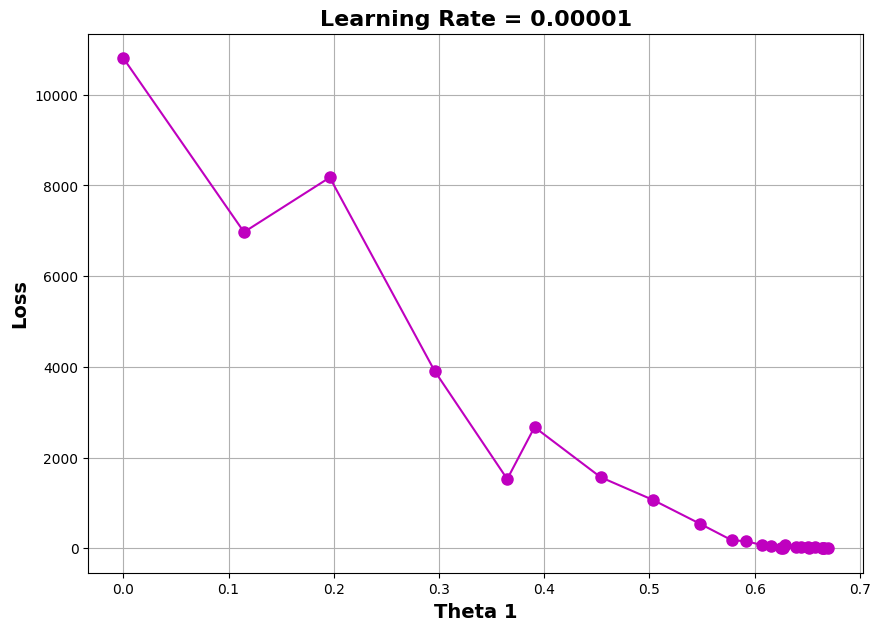

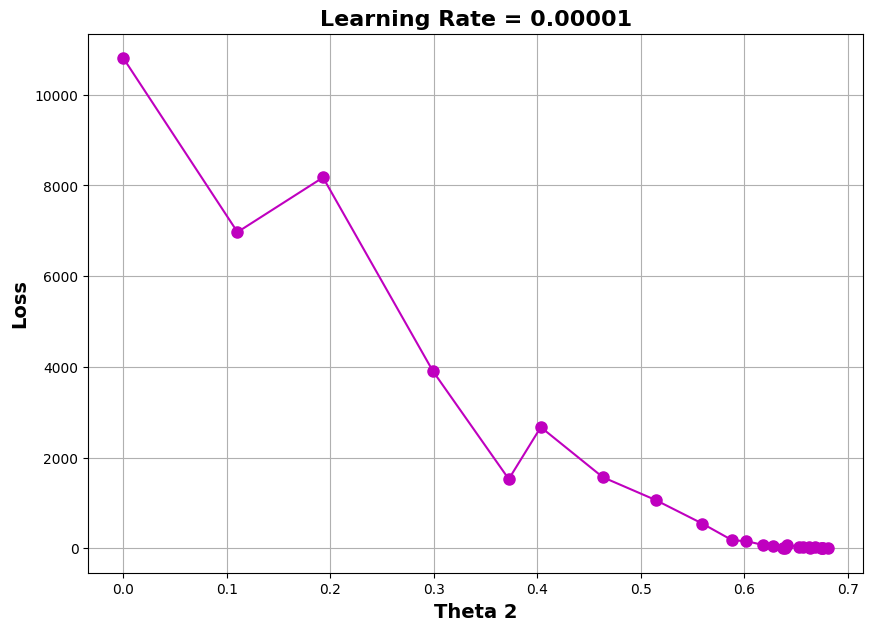

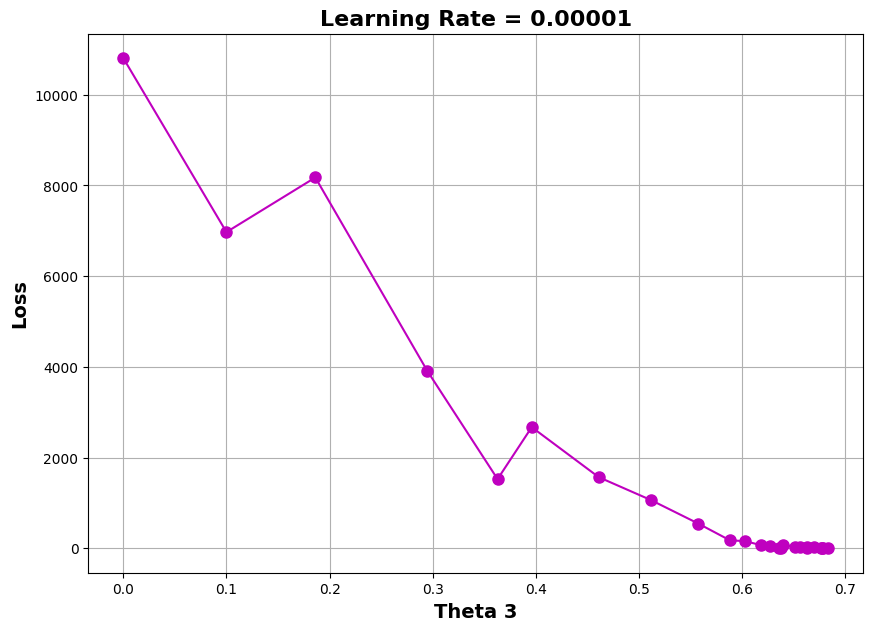

In [21]:
plot_loss_iter(loss,'Learning Rate = 0.00001')
ths_arr = np.array(thetas_all).reshape(len(thetas_all),4)
plot_theta_loss(ths_arr[:,0:1],'Theta 0',loss,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,1:2],'Theta 1',loss,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,2:3],'Theta 2',loss,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,3:4],'Theta 3',loss,'Learning Rate = 0.00001')

### Step 9: Make outer loop to perform as many epochs as you need to reach the stop conditions


##### The following results uses the hyper-parameters alpha = 0.00001, max. epochs = 10000, gradient check=0.1, and cost convergence check=0.001

In [23]:
alpha=0.00001
max_epochs=10000
grad_check=0.1
conv_check=0.001

m = x.shape[0]
X_new = np.concatenate((np.ones((m,1)),x),axis=1)
n_1 = X_new.shape[1]

np.random.seed(101)
D = np.concatenate((X_new,y),axis=1)


np.random.shuffle(D)

X_sh = D[:,0:n_1]
y_sh = D[:,-1]


thetas = np.zeros(n_1)


thetas_all = []
loss = []


for i in range(max_epochs):
    print(f'****************** Epoch {i} ********************\n')

    for k in range(m):
        thetas_all.append(thetas)

        h= thetas @ X_sh[k]

        e = h-y_sh[k]
        j=(e**2)/(2)
        loss.append(j)

        grad = (e*X_sh[k])

        thetas =  thetas - alpha * grad    



    print(f'j = {j}\n')
    grad_norm = np.linalg.norm(grad)
    print(f'Gradient Vector:\n{grad}\n')
    print(f'Gradient Vector Norm:\n{grad_norm}\n')
    opt_thetas=thetas_all[-1]
    print(f'New Thetas : {opt_thetas}\n')

    if grad_norm <grad_check:
        print(f'****************** Training Report ********************\n')
        print(f'Gradient Descent converged after {i+1} epochs\n')
        print(f'Optimum Thetas : {opt_thetas}\n')
        print(f'Cost = {j}\n')
        break
    elif i>0 and np.absolute(loss[-1] - loss[-(m+1)])<conv_check:
        print(f'****************** Training Report ********************\n')
        print(f'Gradient Descent converged after {i+1} epochs\n')
        print(f'Optimum Thetas : {opt_thetas}\n')
        print(f'Cost = {j}\n')
        break

****************** Epoch 0 ********************

j = 0.24204037135034231

Gradient Vector:
[ 0.69575911 48.70313788 45.22434232 51.48617433]

Gradient Vector Norm:
84.07465138146812

New Thetas : [0.00858371 0.66962122 0.6807672  0.68329489]

****************** Epoch 1 ********************

j = 0.9472218676718938

Gradient Vector:
[  1.37638793  96.34715514  89.46521549 101.85270686]

Gradient Vector Norm:
166.32097709997373

New Thetas : [0.00862376 0.67185715 0.68264611 0.68872658]

****************** Epoch 2 ********************

j = 0.961873755509241

Gradient Vector:
[  1.38699225  97.08945774  90.15449647 102.63742675]

Gradient Vector Norm:
167.60239006616783

New Thetas : [0.00862234 0.67091965 0.68134392 0.69090053]

****************** Epoch 3 ********************

j = 0.9727691998645135

Gradient Vector:
[  1.39482558  97.63779063  90.66366273 103.21709295]

Gradient Vector Norm:
168.54895939412754

New Thetas : [0.00862067 0.66997263 0.68003761 0.69304968]

*****************

In [24]:
from sklearn.metrics import r2_score

r squared: 0.9873565654534185


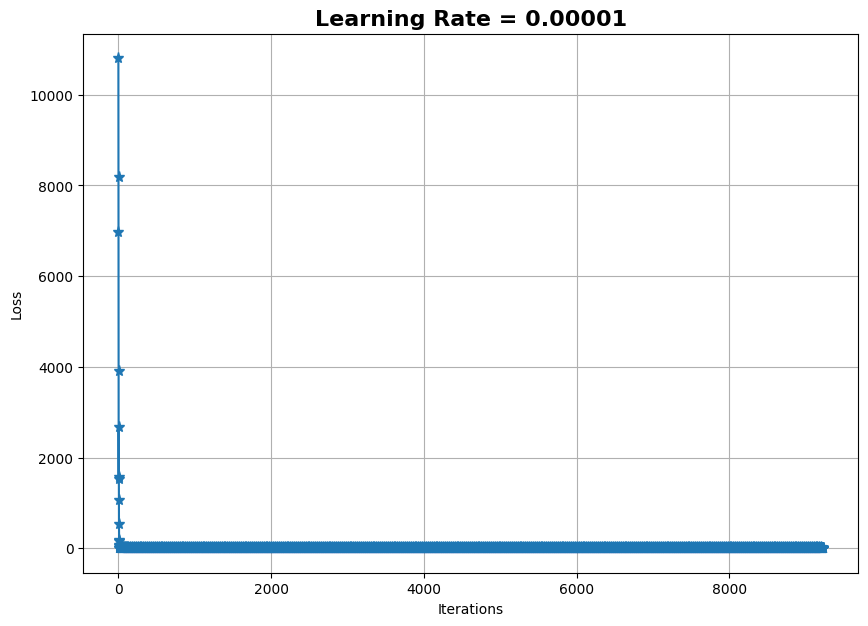

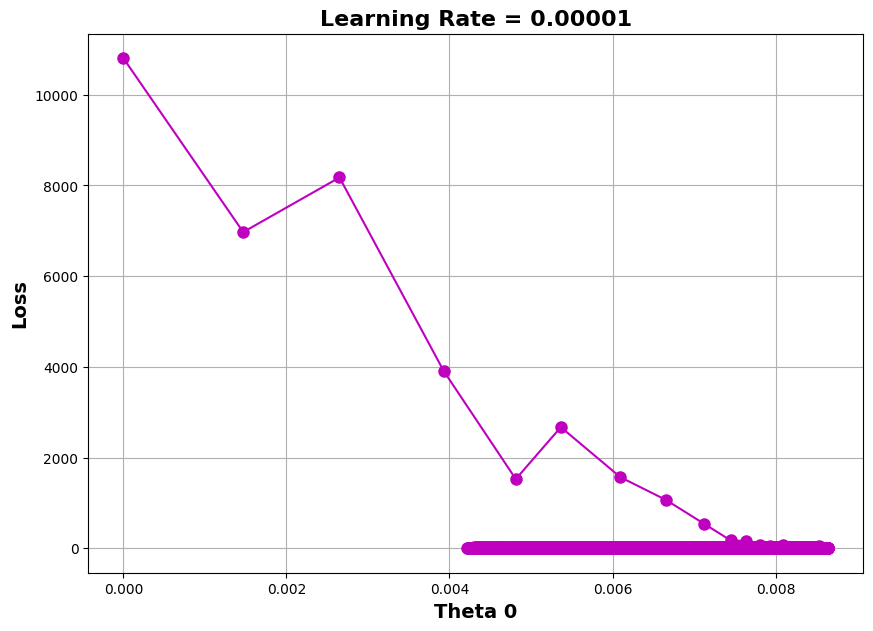

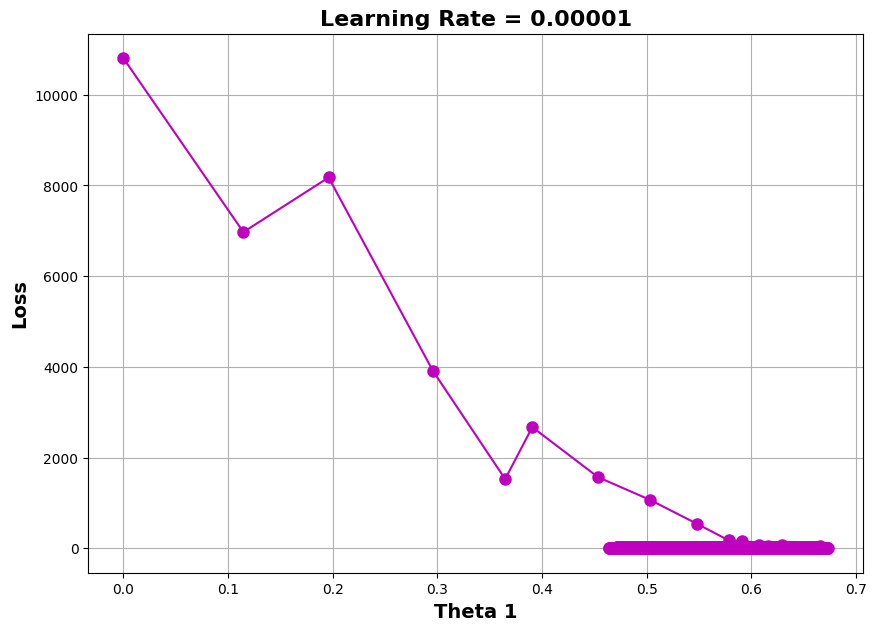

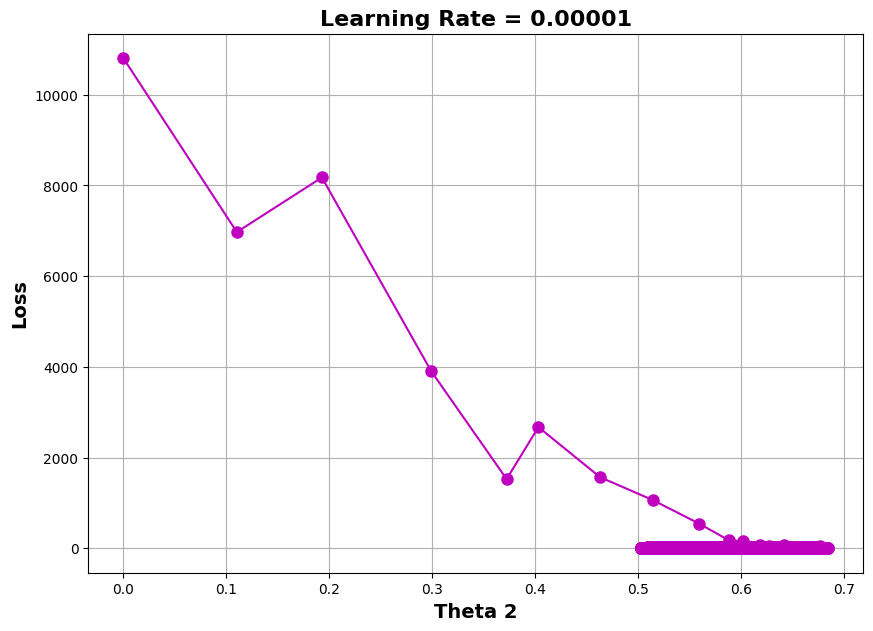

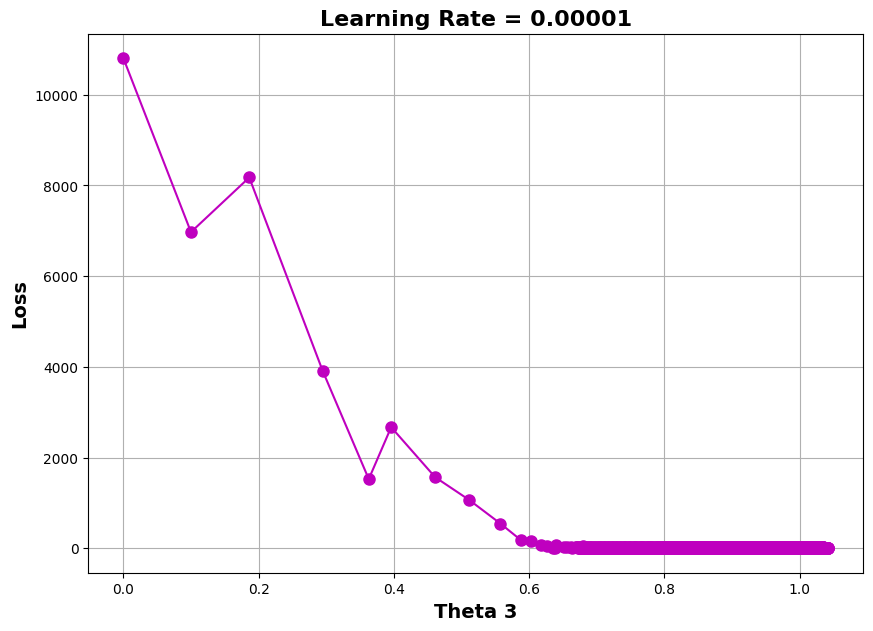

In [25]:
y_pred_GD_Multi = calc_best_fit(thetas_all[-1],X_sh)
print(f'r squared: {r2_score(y_sh,y_pred_GD_Multi)}')

plot_loss_iter(loss,'Learning Rate = 0.00001')
ths_arr = np.array(thetas_all).reshape(len(thetas_all),4)
plot_theta_loss(ths_arr[:,0:1],'Theta 0',loss,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,1:2],'Theta 1',loss,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,2:3],'Theta 2',loss,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,3:4],'Theta 3',loss,'Learning Rate = 0.00001')

### Make your implementation as a function
#### Use your function to run the previous scenario and compare with Multivariable Batch GD.

In [26]:
def SGD_LR_MultiVar(X,y,alpha=0.01,max_epochs=500,grad_check=0.001,conv_check=0.001):
    m = X.shape[0]
    X_new = np.concatenate((np.ones((m,1)),X),axis=1)
    n_1 = X_new.shape[1]

    np.random.seed(101)
    D = np.concatenate((X_new,y),axis=1)
    

    np.random.shuffle(D)
   
    X_sh = D[:,0:n_1]
    y_sh = D[:,-1]
      
    
    thetas = np.zeros(n_1)


    thetas_all = []
    loss = []

    
    for i in range(max_epochs):
        print(f'****************** Epoch {i} ********************\n')
        
        for k in range(m):
            thetas_all.append(thetas)

            h= thetas @ X_sh[k]
              
            e = h-y_sh[k]
            j=(e**2)/(2)
            loss.append(j)
        
            grad = (e*X_sh[k])
            
            thetas =  thetas - alpha * grad    
            
        
        
        print(f'j = {j}\n')
        grad_norm = np.linalg.norm(grad)
        print(f'Gradient Vector:\n{grad}\n')
        print(f'Gradient Vector Norm:\n{grad_norm}\n')
        opt_thetas=thetas[-1]
        print(f'New Thetas : {opt_thetas}\n')
        
        if grad_norm <grad_check:
            print(f'****************** Training Report ********************\n')
            print(f'Gradient Descent converged after {i+1} epochs\n')
            print(f'Optimum Thetas : {opt_thetas}\n')
            print(f'Cost = {j}\n')
            break
        elif i>0 and np.absolute(loss[-1] - loss[-(m+1)])<conv_check:
            print(f'****************** Training Report ********************\n')
            print(f'Gradient Descent converged after {i+1} epochs\n')
            print(f'Optimum Thetas : {opt_thetas}\n')
            print(f'Cost = {j}\n')
            break
        
    
    return loss, thetas_all

### Batch GD

In [27]:
def GD_Multivar(X,y,alpha=0.001,max_iters=1000,grad_check=0.001,conv_check=0.001):
    
    m = X.shape[0]
    X_new = np.concatenate((np.ones((m,1)),X),axis=1)
    n_1 = X_new.shape[1]

    thetas = np.zeros((n_1,1))


    loss = []

    thetas_all = []

    for i in range(max_iters):
        print(f'****************** Iteration {i} ********************\n')
        thetas_all.append(thetas)

        h = X_new@thetas
        print(f'h(x):{h}\n')

        e = h-y

        j= np.linalg.norm(e)**2/(2*m)
        loss.append(j)
        print(f'Error Vector:\n{e}\n')
        print(f'j = {j}\n')

        grad = X_new.T @ e /m
        print(f'Gradient Vector:\n{grad}\n')
        grad_norm = np.linalg.norm(grad)
        print(f'Gradient Vector Norm:\n{grad_norm}\n')

        if grad_norm <grad_check:
            print(f'****************** Training Report ********************\n')
            print(f'Gradient Descent converged after {i+1} epochs\n')
            print(f'theta_Opt :\n {thetas}\n')
            print(f'Error Vector:\n{e}\n')
            print(f'Cost = {j}\n')
            print(f'h(x) = y_predict:\n{h}\n')
            print(f'y_actual:\n{y}\n')
            break
        elif i>0 and np.absolute(loss[i-1] - loss[i])<conv_check:
            print(f'****************** Training Report ********************\n')
            print(f'Gradient Descent converged after {i+1} epochs\n')
            print(f'theta_Opt :\n {thetas}\n')
            print(f'Error Vector:\n{e}\n')
            print(f'Cost = {j}\n')
            print(f'h(x) = y_predict:\n{h}\n')
            print(f'y_actual:\n{y}\n')
            break

        thetas =  thetas - alpha * grad
        print(f'New Thetas : {thetas}\n')
    
    return loss, thetas_all


L,T = GD_Multivar(x,y,0.00001,10000,0.1,0.001)

****************** Iteration 0 ********************

h(x):[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Error Vector:
[[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]

j = 13405.98

Gradient Vector:
[[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]

Gradient Vector Norm:
22917.5459892197

New Thetas : [[0.0016204]
 [0.130758 ]
 [0.131472 ]
 [0.1346708]]

****************** Iteration 1 ********************

h(x):[[30.1650244]
 [36.2560348]
 [35.7234064]
 [38.9057244]
 [27.6510624]
 [20.3864004]
 [29.122502 ]
 [21.5899264]
 [33.8842264]
 [31.3855728]
 [28.0579308]
 [27.6659996]
 [36.9069972]
 [30.6802308]
 [29.2564588]
 [36.7915192]
 [29.2187588]
 [34.9498828]
 [35.1854372]
 [31.482572 ]
 [34.1507404]
 [34.

r squared: 0.9797103568402049


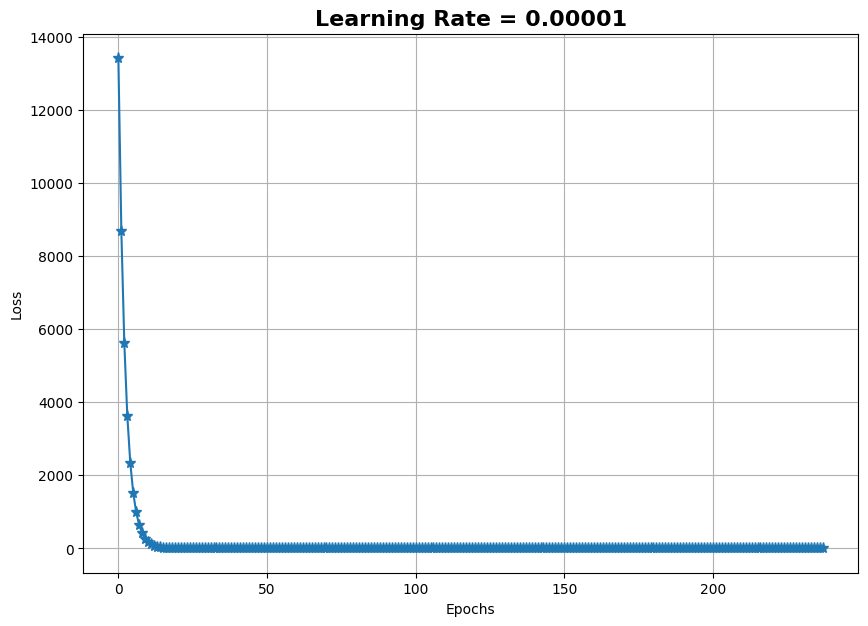

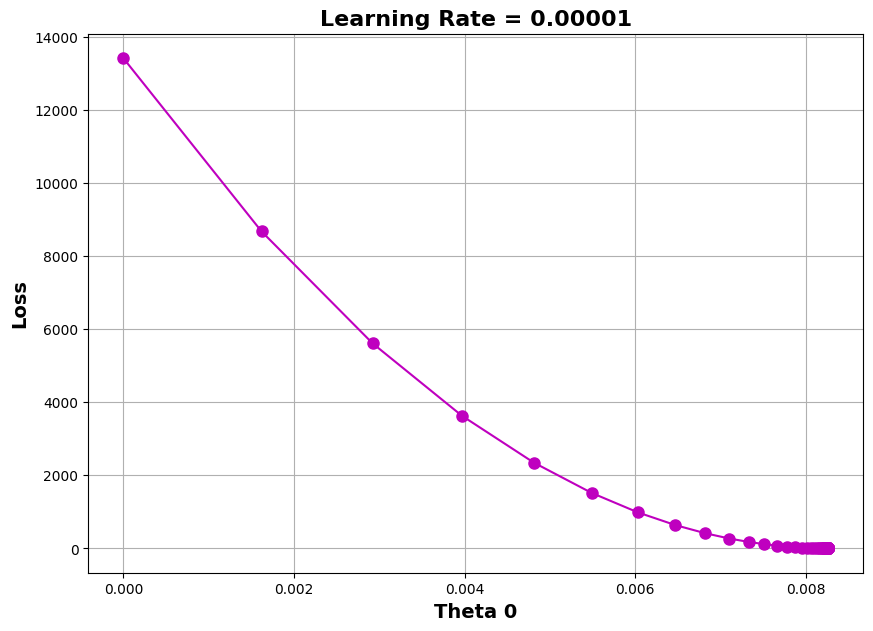

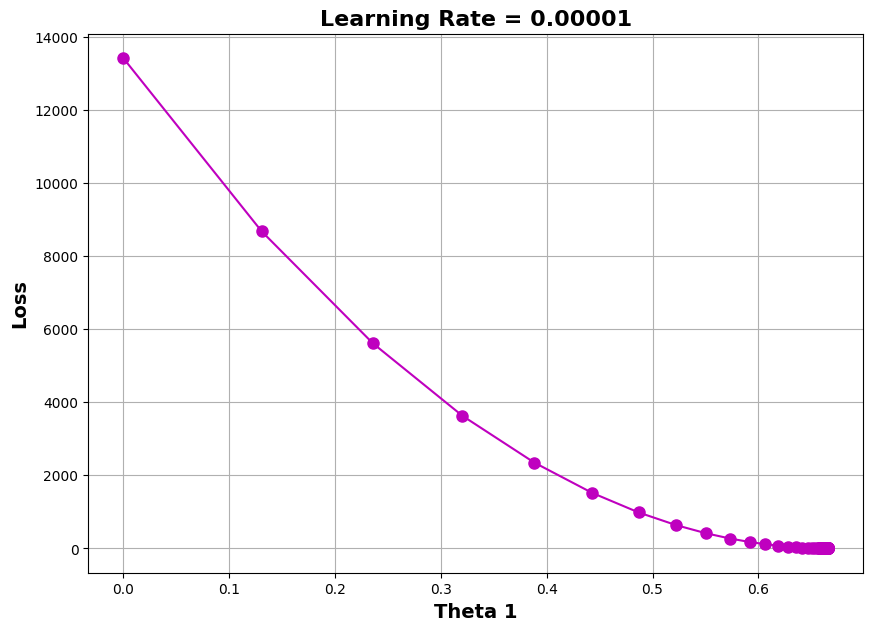

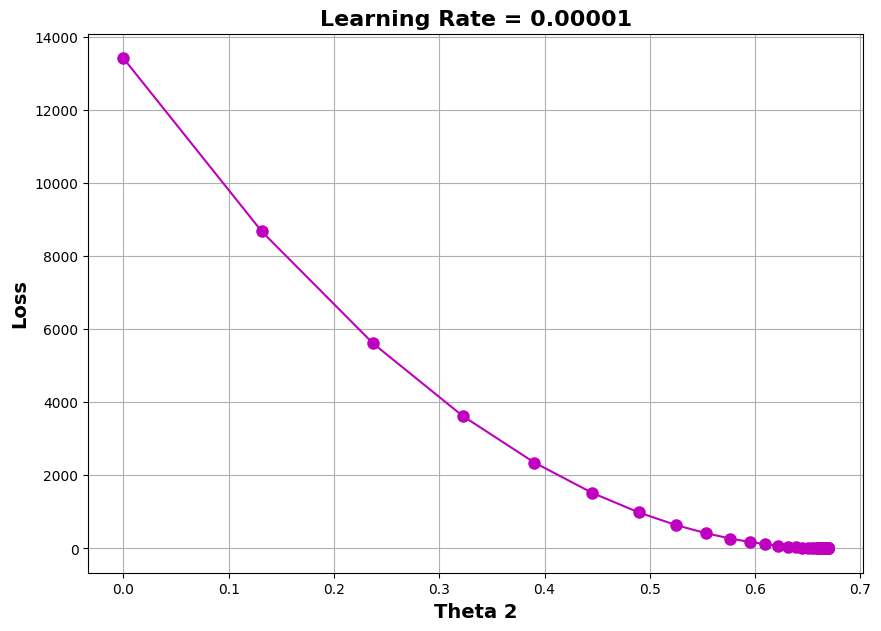

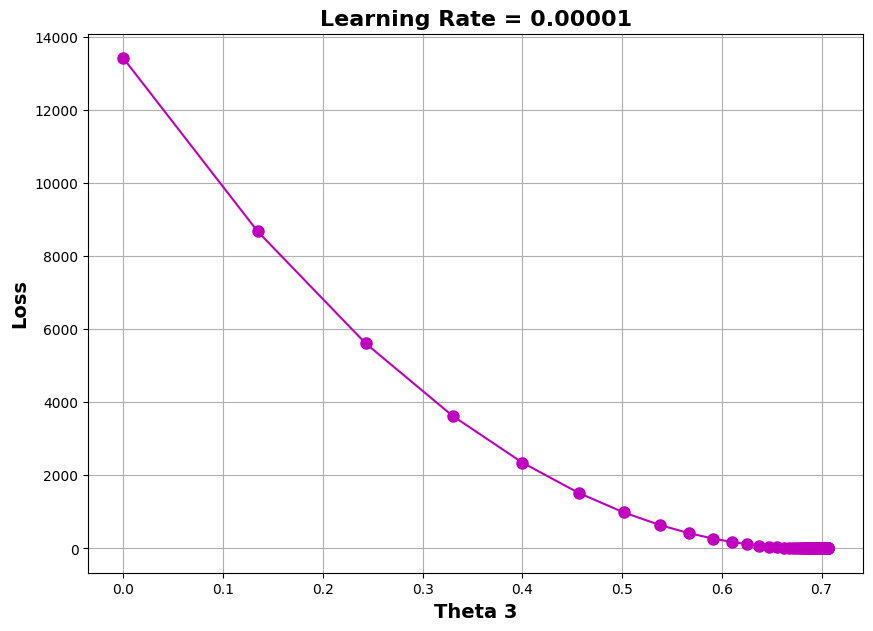

In [28]:
y_pred_GD_Multi = calc_best_fit(T[-1],X_new)
print(f'r squared: {r2_score(y,y_pred_GD_Multi)}')

plot_loss(L,'Learning Rate = 0.00001')
ths_arr = np.array(T).reshape(len(T),4)
plot_theta_loss(ths_arr[:,0:1],'Theta 0',L,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,1:2],'Theta 1',L,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,2:3],'Theta 2',L,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,3:4],'Theta 3',L,'Learning Rate = 0.00001')

### SGD

In [29]:
L,T = SGD_LR_MultiVar(x,y,0.00001,10000,0.1,0.001)

****************** Epoch 0 ********************

j = 0.24204037135034231

Gradient Vector:
[ 0.69575911 48.70313788 45.22434232 51.48617433]

Gradient Vector Norm:
84.07465138146812

New Thetas : 0.6827800314537149

****************** Epoch 1 ********************

j = 0.9472218676718938

Gradient Vector:
[  1.37638793  96.34715514  89.46521549 101.85270686]

Gradient Vector Norm:
166.32097709997373

New Thetas : 0.6877080515350137

****************** Epoch 2 ********************

j = 0.961873755509241

Gradient Vector:
[  1.38699225  97.08945774  90.15449647 102.63742675]

Gradient Vector Norm:
167.60239006616783

New Thetas : 0.6898741592735244

****************** Epoch 3 ********************

j = 0.9727691998645135

Gradient Vector:
[  1.39482558  97.63779063  90.66366273 103.21709295]

Gradient Vector Norm:
168.54895939412754

New Thetas : 0.6920175132882322

****************** Epoch 4 ********************

j = 0.9836371180617012

Gradient Vector:
[  1.40259554  98.18168748  91.1687

r squared: 0.9873565654534185


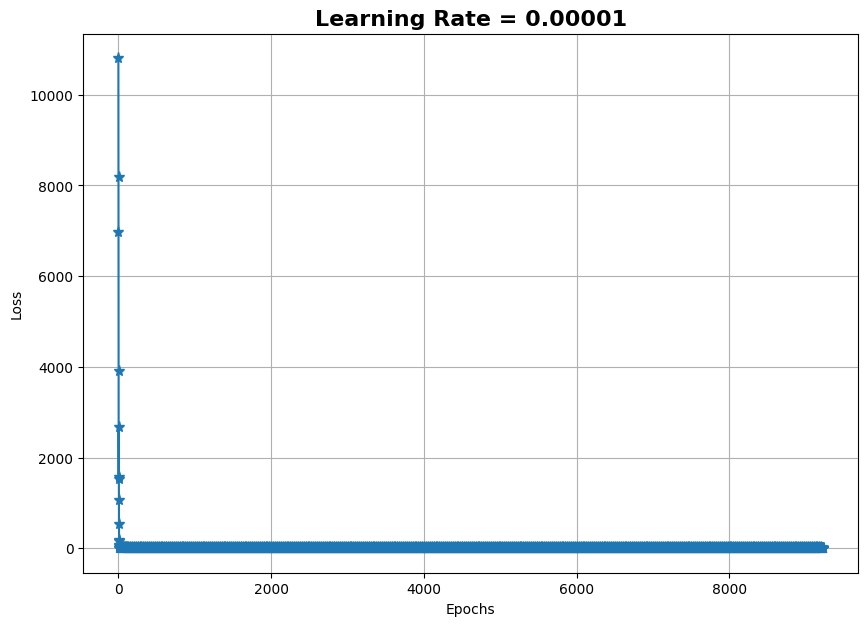

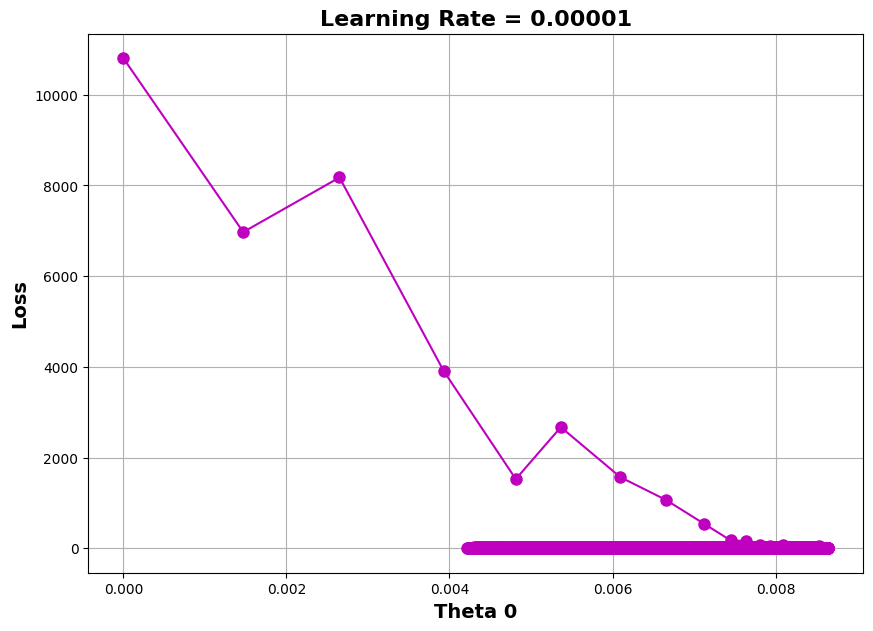

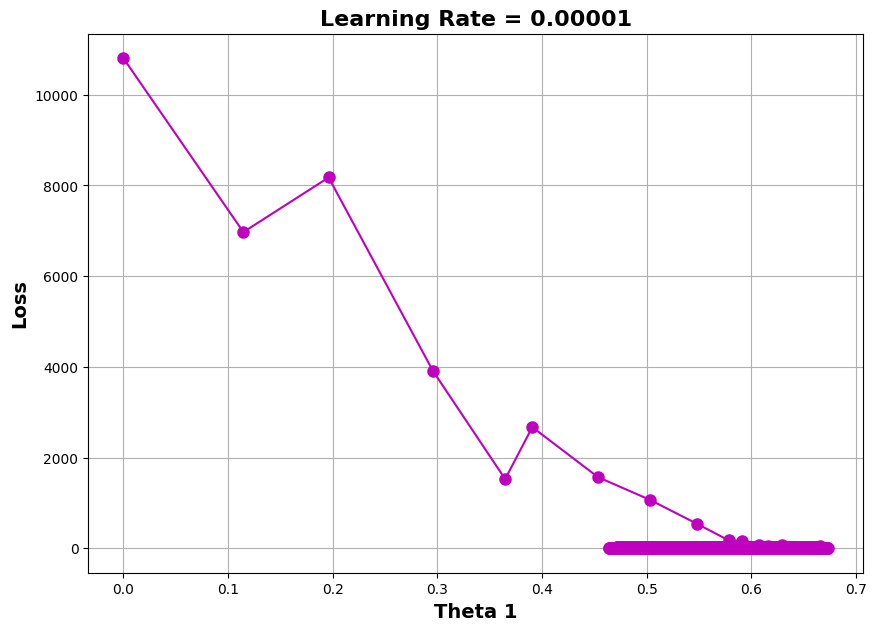

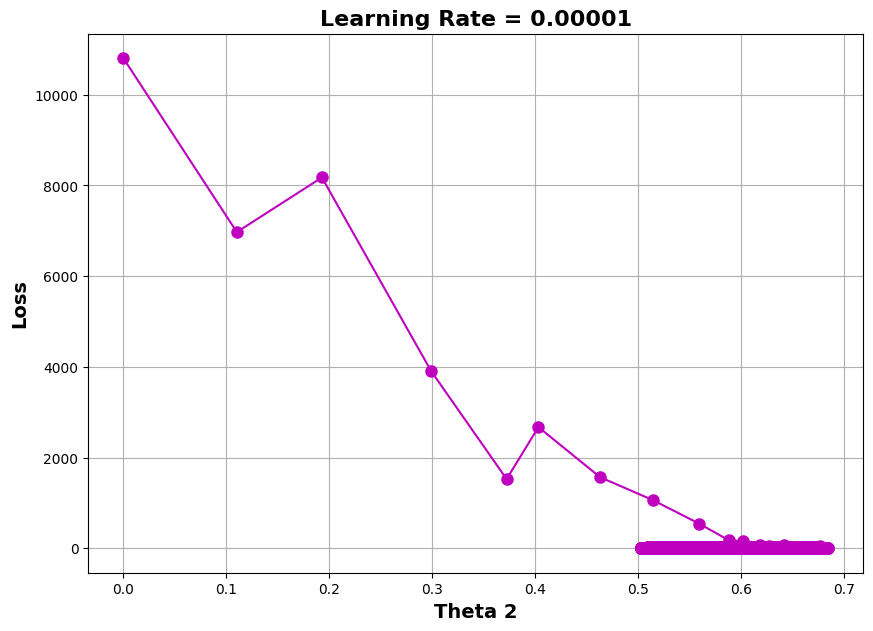

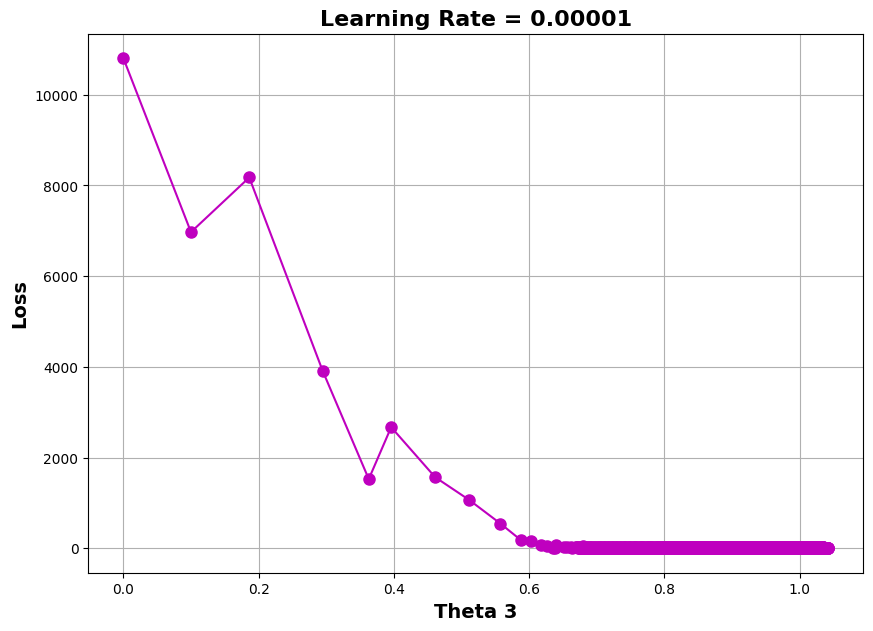

In [30]:
y_pred_GD_Multi = calc_best_fit(T[-1],X_new)
print(f'r squared: {r2_score(y,y_pred_GD_Multi)}')

plot_loss(L,'Learning Rate = 0.00001')
ths_arr = np.array(T).reshape(len(T),4)
plot_theta_loss(ths_arr[:,0:1],'Theta 0',L,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,1:2],'Theta 1',L,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,2:3],'Theta 2',L,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,3:4],'Theta 3',L,'Learning Rate = 0.00001')